<a href="https://colab.research.google.com/github/sulagna206/cardio-analysis/blob/main/cardio_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
cardio = pd.read_csv('https://sulagna206.github.io/cardio-analysis/CardioGoodFitness-1.csv')

In [ ]:
cardio.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [ ]:
cardio.shape

(180, 9)

In [ ]:
cardio.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [ ]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


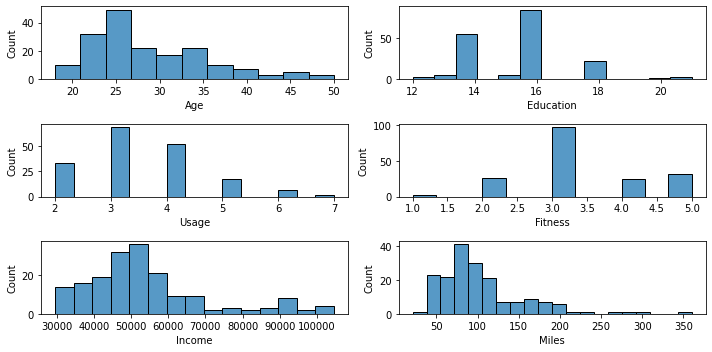

In [ ]:
#histograms of all numeric datas
plt.figure(figsize=(10,5))
plt.subplot(3,2,1)
sns.histplot(cardio['Age'])
plt.subplot(3,2,2)
sns.histplot(cardio['Education'])
plt.subplot(3,2,3)
sns.histplot(cardio['Usage'])
plt.subplot(3,2,4)
sns.histplot(cardio['Fitness'])
plt.subplot(3,2,5)
sns.histplot(cardio['Income'])
plt.subplot(3,2,6)
sns.histplot(cardio['Miles'])
plt.tight_layout() 
plt.show()

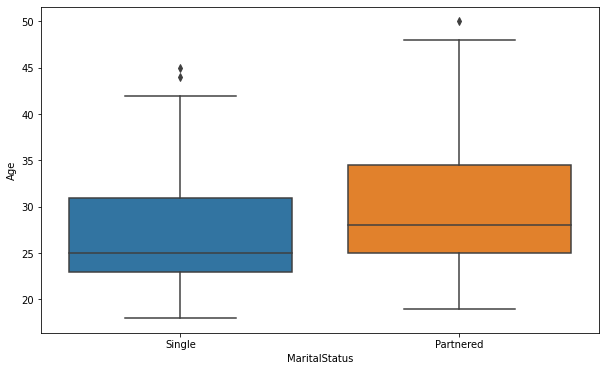

In [ ]:
#boxplot for marital status
plt.figure(figsize=(10,6))
sns.boxplot(x=cardio['MaritalStatus'],y=cardio['Age'],data=cardio)
plt.show()

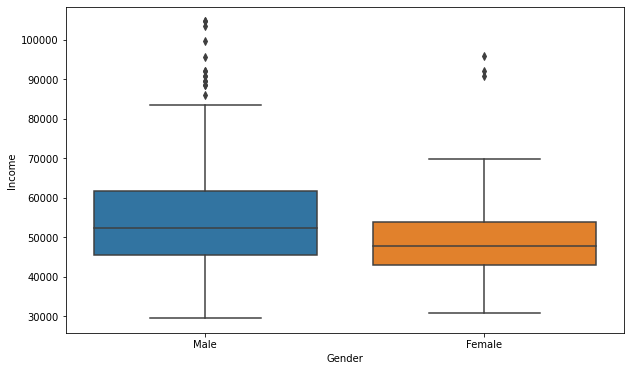

In [ ]:
#comaprison of incomes based on genders
plt.figure(figsize=(10,6))
sns.boxplot(x=cardio['Gender'],y=cardio['Income'],data=cardio)
plt.show()

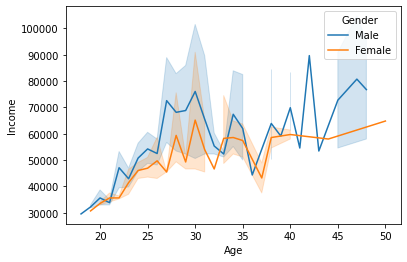

In [ ]:
#variation of Income with age
sns.lineplot(x=cardio['Age'],y=cardio['Income'],data=cardio,hue=cardio['Gender'])
plt.show()

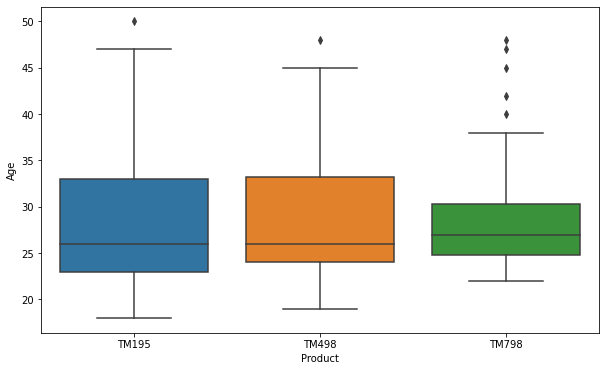

In [ ]:
#age preferences of different products
plt.figure(figsize=(10,6))
sns.boxplot(x=cardio['Product'],y=cardio['Age'],data=cardio)
plt.show()

In [ ]:
#learning preference of product by different genders
pd.crosstab(cardio['Product'],cardio['Gender'])

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


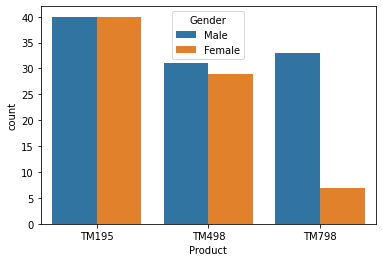

In [ ]:
#learning preference of product by different genders
sns.countplot(x=cardio['Product'],hue=cardio['Gender'])
plt.show()

In [ ]:
#learning preference of product by different marital status
pd.crosstab(cardio['Product'],cardio['MaritalStatus'])

MaritalStatus,Partnered,Single
Product,,
TM195,48,32
TM498,36,24
TM798,23,17


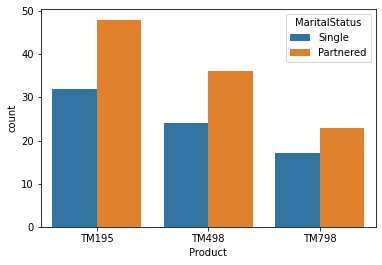

In [27]:
#learning preference of product by different marital status
sns.countplot(x=cardio['Product'],hue=cardio['MaritalStatus'])
plt.show()

In [28]:
#pivot table of mean Income for different products and gender
table= pd.pivot_table(cardio,'Income',index=['Product','Gender'])
table

Income
Product Gender              
TM195   Female  46020.075000
        Male    46815.975000
TM498   Female  49336.448276
        Male    48634.258065
TM798   Female  73633.857143
        Male    75825.030303

In [ ]:
#pivot table of mean Miles run/walk for different products and gender
table2 = pd.pivot_table(cardio,'Miles',index='Product',columns='Gender')
table2

Gender,Female,Male
Product,,
TM195,76.200000,89.375000
TM498,87.344828,88.483871
TM798,180.000000,164.121212


In [ ]:
#pivot table of Age range for different products and gender
table3 = pd.pivot_table(cardio,index='Product',values='Age',columns='Gender',aggfunc={max,min})
table3

max         min     
Gender  Female Male Female Male
Product                        
TM195       50   47     19   18
TM498       40   48     20   19
TM798       33   48     23   22

In [ ]:
table4 =pd.pivot_table(cardio,values=['Income','Age'],index=['Gender','Product'])
table4

Age        Income
Gender Product                         
Female TM195    28.450000  46020.075000
       TM498    29.103448  49336.448276
       TM798    27.000000  73633.857143
Male   TM195    28.650000  46815.975000
       TM498    28.709677  48634.258065
       TM798    29.545455  75825.030303

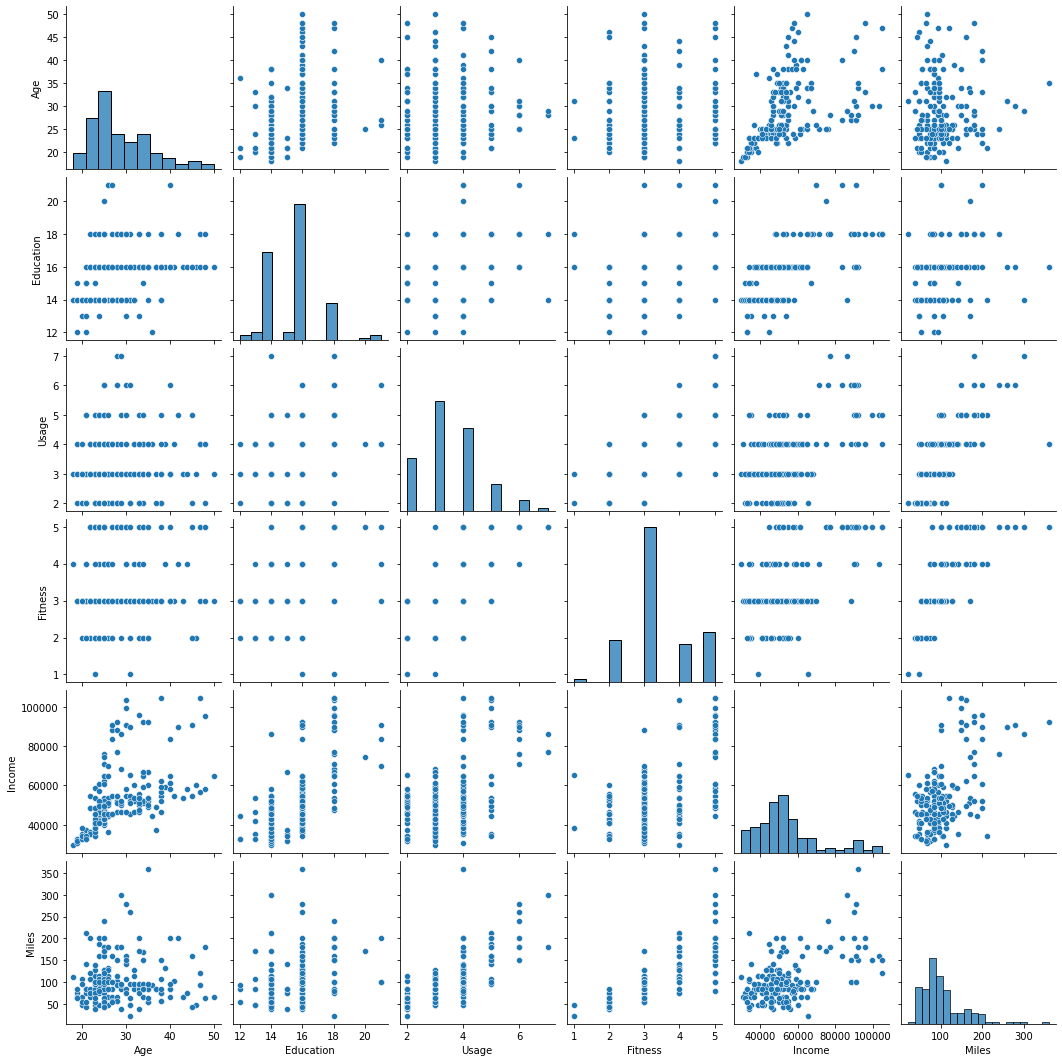

In [ ]:
sns.pairplot(cardio)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


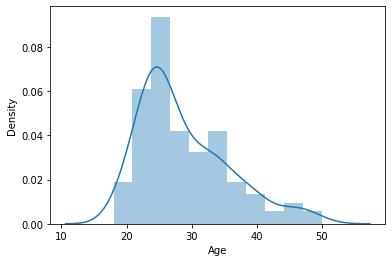

In [ ]:
sns.distplot(cardio['Age'])

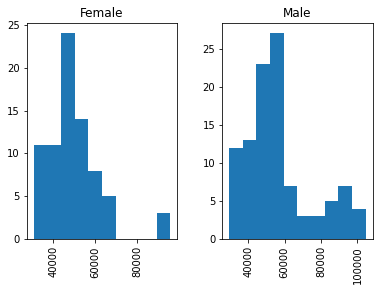

In [ ]:
cardio.hist(by='Gender',column='Income')
plt.show()

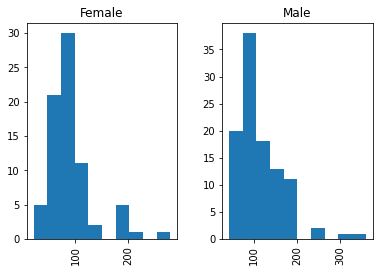

In [ ]:
cardio.hist(by='Gender',column='Miles')
plt.show()

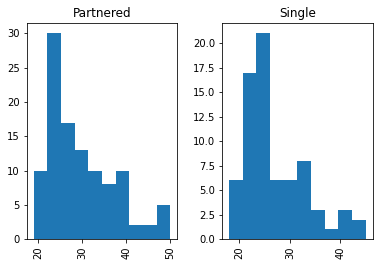

In [ ]:
cardio.hist(by='MaritalStatus',column='Age')
plt.show()

<Figure size 720x432 with 0 Axes>

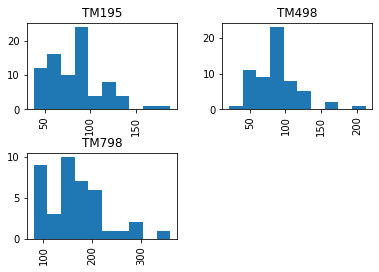

In [ ]:
plt.figure(figsize=(10,6))
cardio.hist(by='Product',column='Miles')
plt.show()

In [ ]:
corr = cardio.corr()
corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


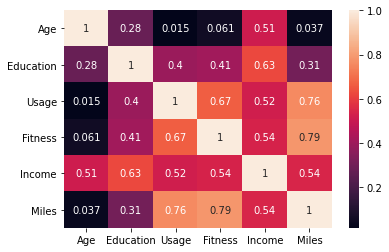

In [ ]:
sns.heatmap(corr,annot=True)
plt.show()